## Import Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection , metrics
from sklearn.svm import SVC
import seaborn as sb
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Imoprt Dataset

In [2]:
df = pd.read_csv('data_5K.csv')

In [3]:
df.head()

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P545,38,1,7,1,6,7,4,1,3,...,3,1,1,1,6,4,3,2,3,Medium
1,P754,39,1,3,7,7,7,7,6,7,...,4,4,6,2,4,2,3,2,5,High
2,P986,25,1,1,3,3,8,3,2,7,...,7,5,2,4,7,9,2,5,2,Medium
3,P3,38,1,1,7,4,4,1,3,7,...,1,2,1,5,2,6,1,1,3,Medium
4,P470,55,2,3,1,3,4,4,2,3,...,4,1,3,2,2,9,1,2,4,Low


## Pre-Processing

In [4]:
df.shape

(5000, 25)

In [5]:
df.columns

Index(['Patient Id', 'Age', 'Gender', 'AirPollution', 'Alcoholuse',
       'DustAllergy', 'OccuPationalHazards', 'GeneticRisk',
       'chronicLungDisease', 'BalancedDiet', 'Obesity', 'Smoking',
       'PassiveSmoker', 'ChestPain', 'CoughingofBlood', 'Fatigue',
       'WeightLoss', 'ShortnessofBreath', 'Wheezing', 'SwallowingDifficulty',
       'ClubbingofFingerNails', 'FrequentCold', 'DryCough', 'Snoring',
       'Level'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient Id             5000 non-null   object
 1   Age                    5000 non-null   int64 
 2   Gender                 5000 non-null   int64 
 3   AirPollution           5000 non-null   int64 
 4   Alcoholuse             5000 non-null   int64 
 5   DustAllergy            5000 non-null   int64 
 6   OccuPationalHazards    5000 non-null   int64 
 7   GeneticRisk            5000 non-null   int64 
 8   chronicLungDisease     5000 non-null   int64 
 9   BalancedDiet           5000 non-null   int64 
 10  Obesity                5000 non-null   int64 
 11  Smoking                5000 non-null   int64 
 12  PassiveSmoker          5000 non-null   int64 
 13  ChestPain              5000 non-null   int64 
 14  CoughingofBlood        5000 non-null   int64 
 15  Fatigue              

In [7]:
df.isnull().sum()

Patient Id               0
Age                      0
Gender                   0
AirPollution             0
Alcoholuse               0
DustAllergy              0
OccuPationalHazards      0
GeneticRisk              0
chronicLungDisease       0
BalancedDiet             0
Obesity                  0
Smoking                  0
PassiveSmoker            0
ChestPain                0
CoughingofBlood          0
Fatigue                  0
WeightLoss               0
ShortnessofBreath        0
Wheezing                 0
SwallowingDifficulty     0
ClubbingofFingerNails    0
FrequentCold             0
DryCough                 0
Snoring                  0
Level                    0
dtype: int64

In [8]:
df[df.duplicated()]

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level


In [9]:
df.drop_duplicates()

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P545,38,1,7,1,6,7,4,1,3,...,3,1,1,1,6,4,3,2,3,Medium
1,P754,39,1,3,7,7,7,7,6,7,...,4,4,6,2,4,2,3,2,5,High
2,P986,25,1,1,3,3,8,3,2,7,...,7,5,2,4,7,9,2,5,2,Medium
3,P3,38,1,1,7,4,4,1,3,7,...,1,2,1,5,2,6,1,1,3,Medium
4,P470,55,2,3,1,3,4,4,2,3,...,4,1,3,2,2,9,1,2,4,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P380,38,1,3,3,7,2,3,7,2,...,1,4,1,6,1,5,3,3,2,Medium
4996,P119,14,1,2,3,7,2,2,2,3,...,5,2,6,5,2,4,2,2,4,Medium
4997,P320,32,2,6,8,7,7,7,7,7,...,3,2,6,6,4,4,6,6,2,High
4998,P526,71,1,2,3,7,3,3,3,1,...,3,3,5,2,2,3,2,5,4,Low


## Label Encoding

In [10]:
# df['Gender']

In [11]:
df['Level']

0       Medium
1         High
2       Medium
3       Medium
4          Low
         ...  
4995    Medium
4996    Medium
4997      High
4998       Low
4999    Medium
Name: Level, Length: 5000, dtype: object

In [12]:
df.describe()

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,CoughingofBlood,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.0000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,37.66720,1.530000,3.909800,4.252200,5.014600,4.887200,4.642400,4.320200,4.291600,4.459400,...,4.4484,3.7886,3.699200,3.991200,4.053800,3.693800,4.127200,3.345600,3.733000,2.826800
std,13.23711,0.499149,2.091922,2.634081,2.130093,2.128422,2.061109,1.953672,2.155713,2.156034,...,2.4406,2.1039,2.126787,2.246805,1.962365,1.894824,2.399119,1.605701,2.114191,1.362928
min,14.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,29.00000,1.000000,2.000000,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,3.0000,2.0000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.00000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.0000,3.0000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000
75%,44.00000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.250000,7.000000,...,7.0000,5.0000,6.000000,6.000000,5.000000,5.000000,5.000000,4.000000,6.000000,4.000000
max,73.00000,2.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.0000,9.0000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [13]:
df.describe(include='object')

,Patient Id,Level
count,5000,5000
unique,589,3
top,P551,High
freq,123,1818


## Data Analysis

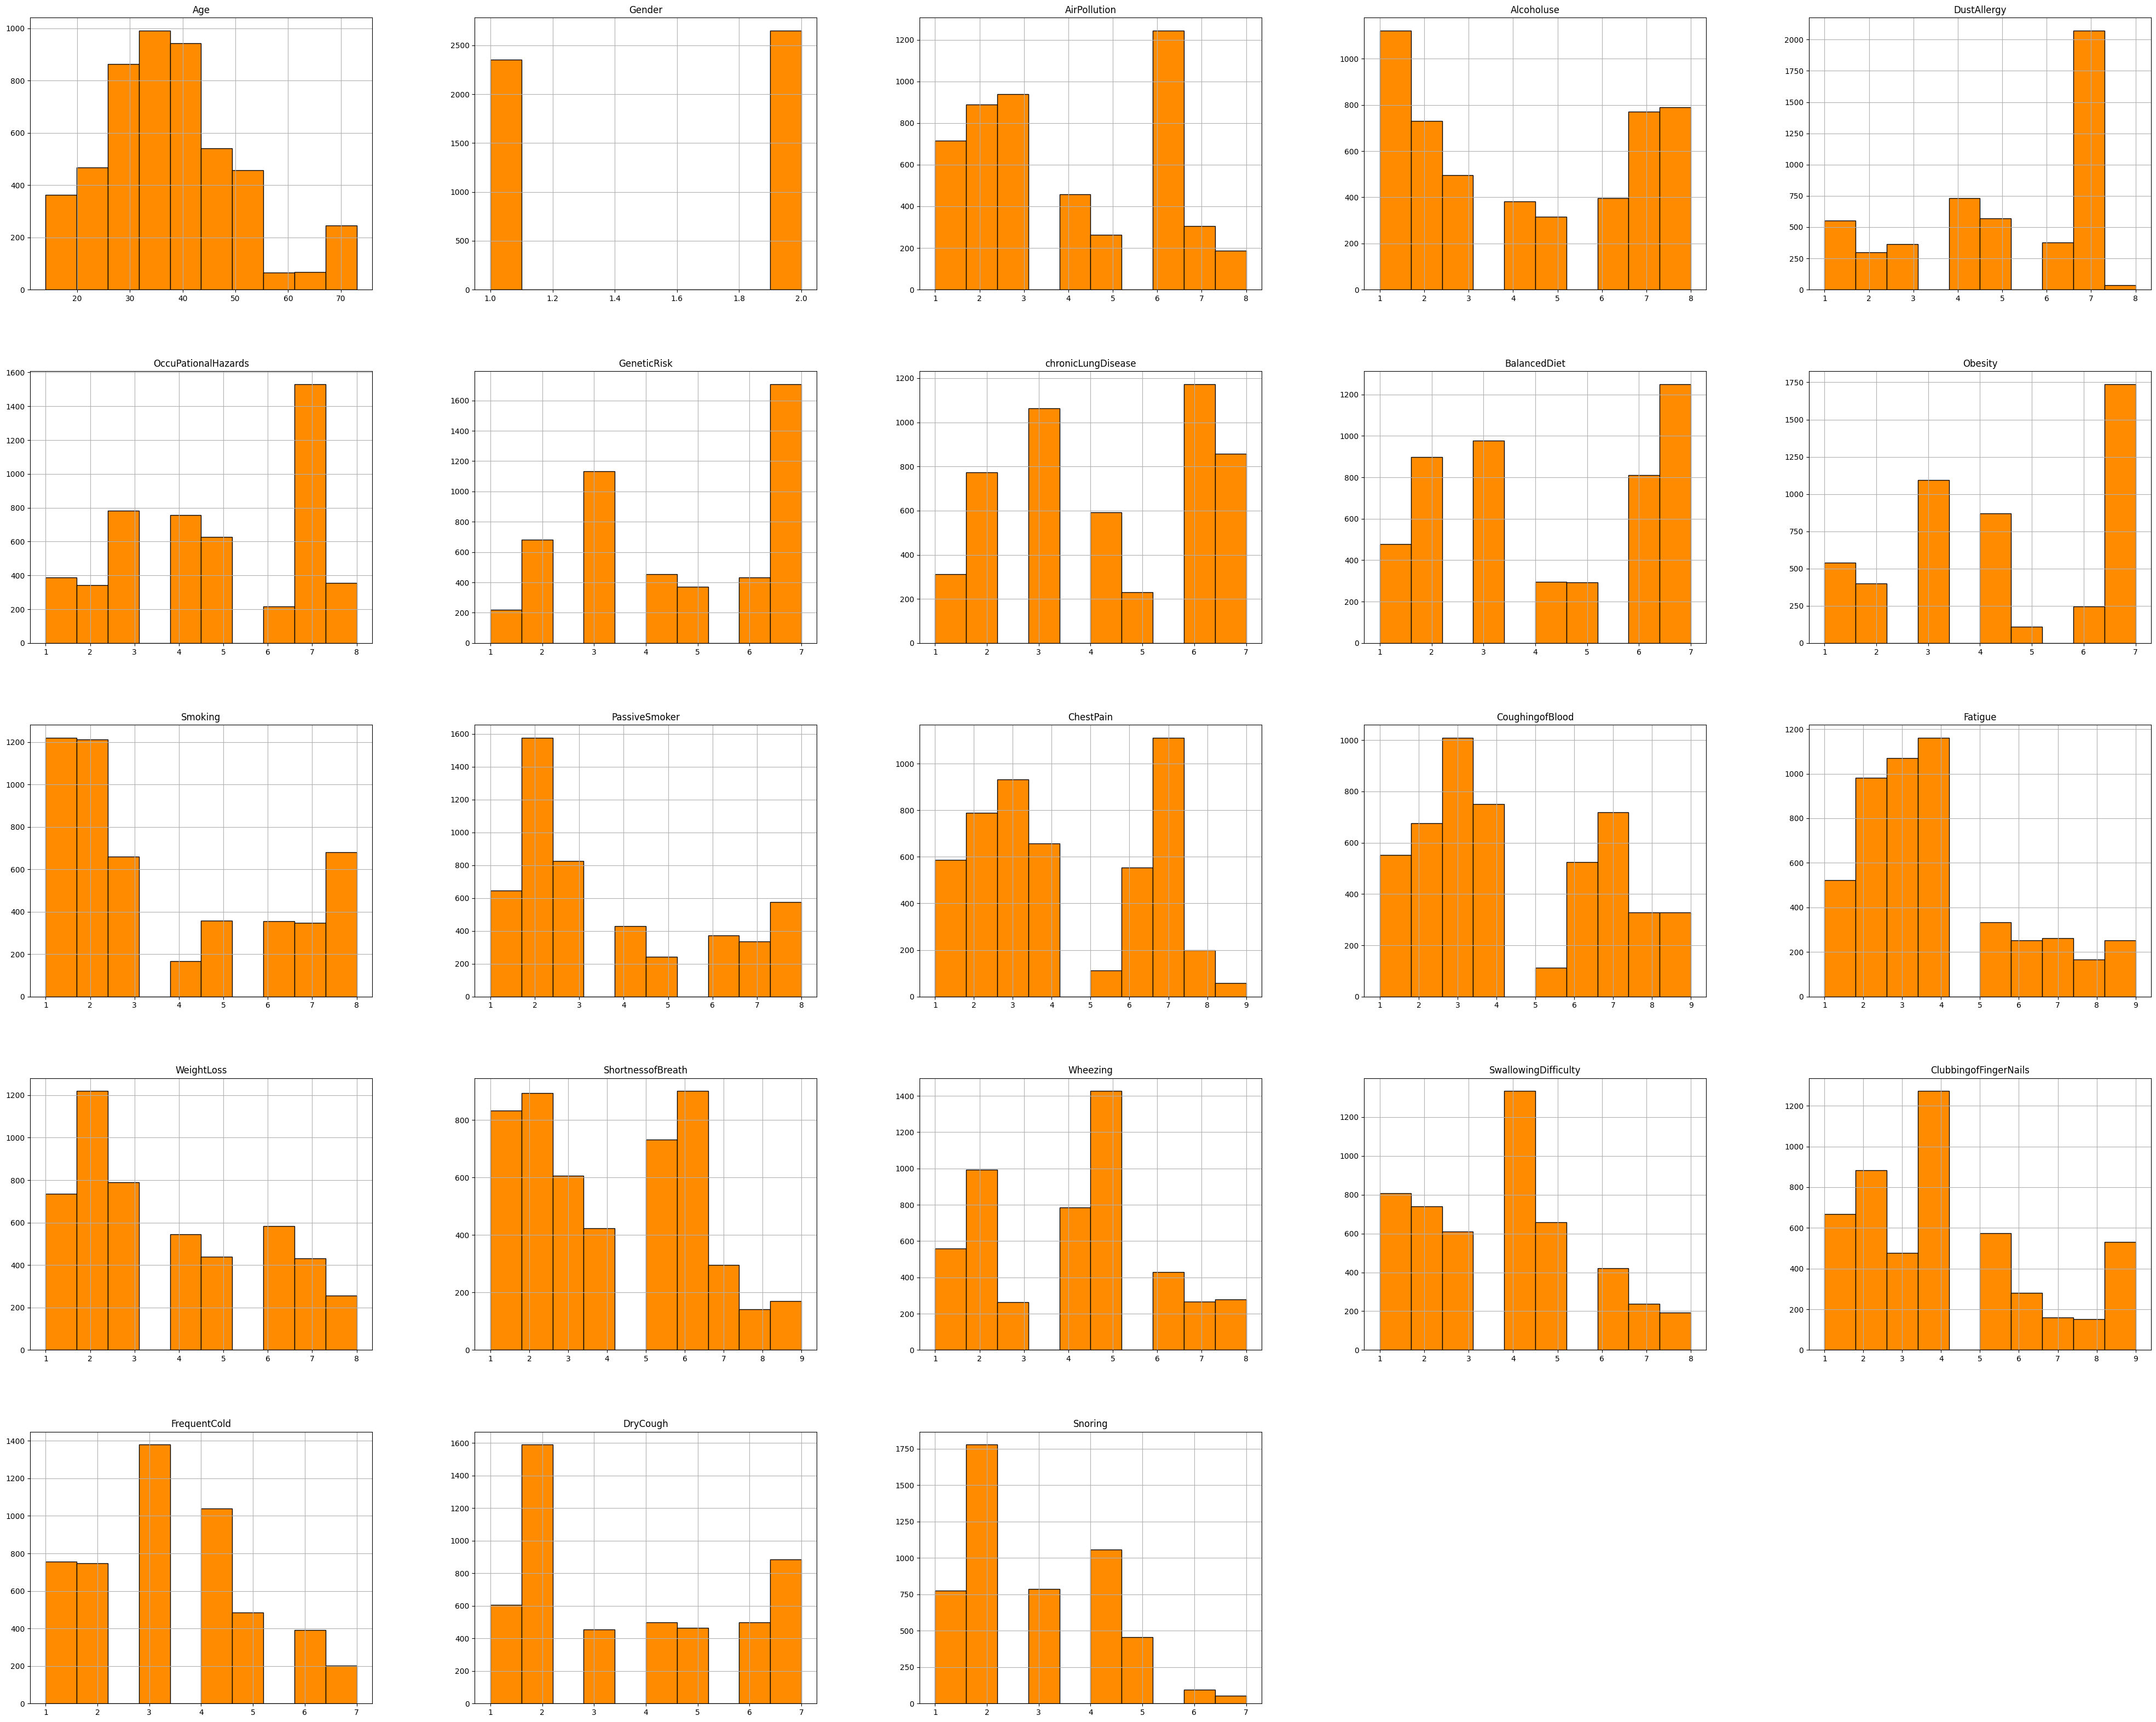

In [14]:
df.hist(figsize = (50,40),color = 'darkorange',edgecolor = 'black')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


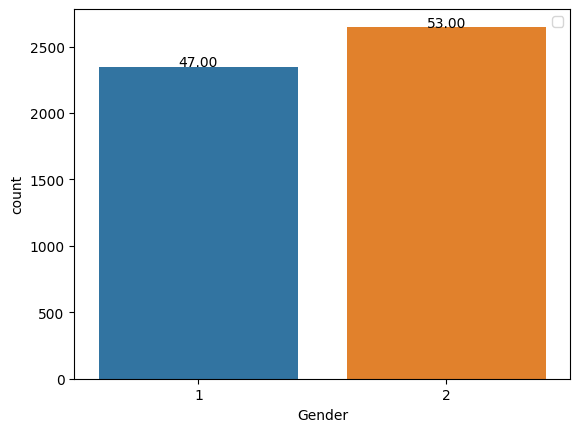

In [15]:
total = float(df.shape[0])
ploting = sb.countplot(x='Gender', data=df)
for p in ploting.patches:
    height = p.get_height()
    ploting.text(p.get_x() + p.get_width()/2.,
           height,
           '{:.2f}'.format((height/total)*100),
           ha='center')
plt.legend()
plt.show()

In [16]:
df['Level'] = df['Level'].map({'Low':1,'Medium':2,'High':3})

<Axes: >

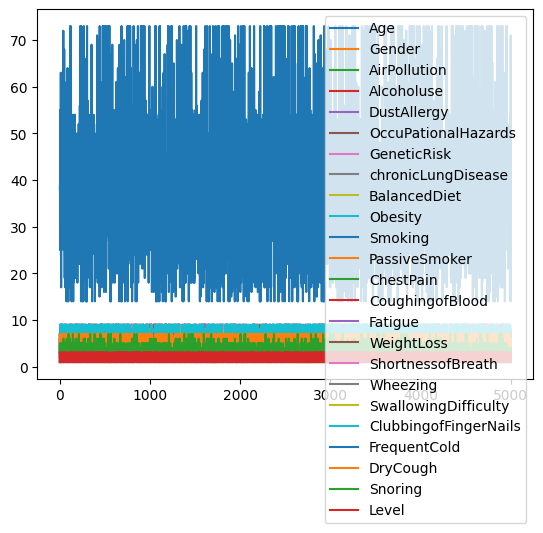

In [17]:
df.plot()

In [18]:
df.columns

Index(['Patient Id', 'Age', 'Gender', 'AirPollution', 'Alcoholuse',
       'DustAllergy', 'OccuPationalHazards', 'GeneticRisk',
       'chronicLungDisease', 'BalancedDiet', 'Obesity', 'Smoking',
       'PassiveSmoker', 'ChestPain', 'CoughingofBlood', 'Fatigue',
       'WeightLoss', 'ShortnessofBreath', 'Wheezing', 'SwallowingDifficulty',
       'ClubbingofFingerNails', 'FrequentCold', 'DryCough', 'Snoring',
       'Level'],
      dtype='object')

In [19]:
    df=df.drop(['Patient Id'], axis=1)
df

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,38,1,7,1,6,7,4,1,3,3,...,3,1,1,1,6,4,3,2,3,2
1,39,1,3,7,7,7,7,6,7,7,...,4,4,6,2,4,2,3,2,5,3
2,25,1,1,3,3,8,3,2,7,3,...,7,5,2,4,7,9,2,5,2,2
3,38,1,1,7,4,4,1,3,7,3,...,1,2,1,5,2,6,1,1,3,2
4,55,2,3,1,3,4,4,2,3,3,...,4,1,3,2,2,9,1,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,38,1,3,3,7,2,3,7,2,3,...,1,4,1,6,1,5,3,3,2,2
4996,14,1,2,3,7,2,2,2,3,2,...,5,2,6,5,2,4,2,2,4,2
4997,32,2,6,8,7,7,7,7,7,7,...,3,2,6,6,4,4,6,6,2,3
4998,71,1,2,3,7,3,3,3,1,4,...,3,3,5,2,2,3,2,5,4,1


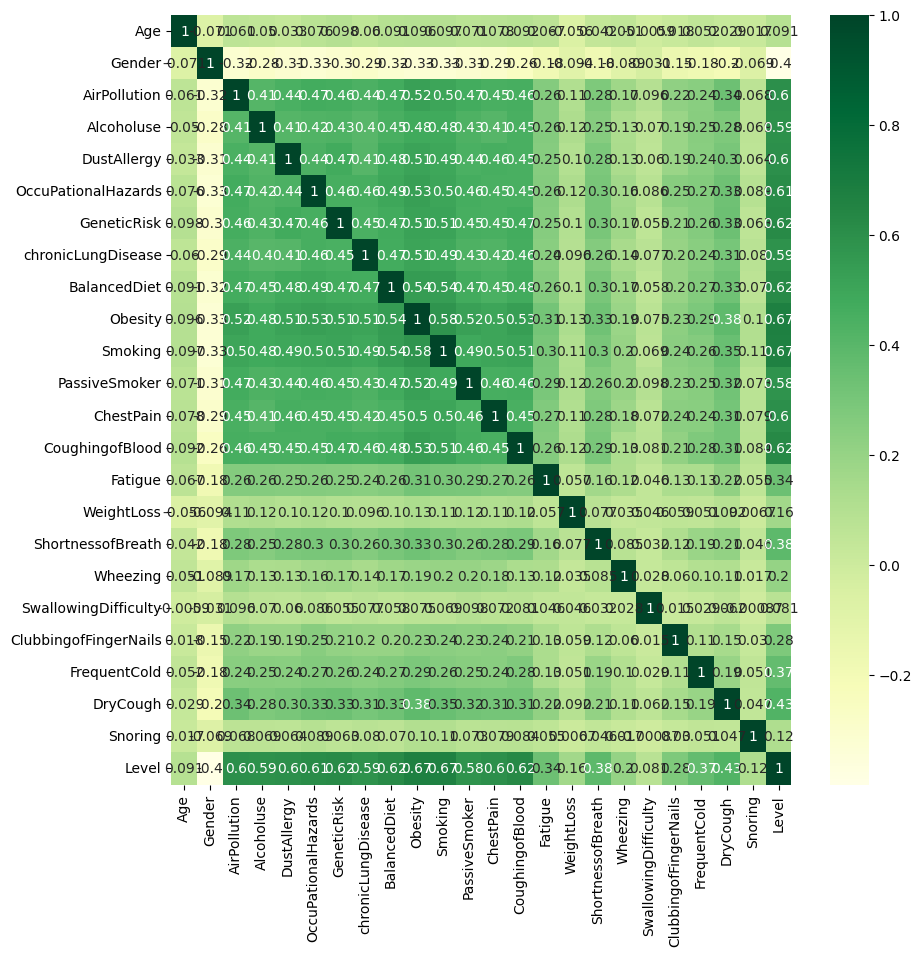

In [20]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(10,10))
ax = sb.heatmap(df[features].corr(), annot=True, cmap='YlGn')

## Splitting dataset into train and test data

In [21]:
X = df.iloc[:,:-1]
y = df['Level']

In [22]:
estimator = DecisionTreeClassifier()
selector = RFECV(estimator)
selector = selector.fit(X, y)

In [23]:
print("Optimal number of features: %d" % selector.n_features_)
print("Selected features: %s" % selector.support_)

Optimal number of features: 23
Selected features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


In [24]:
for eligible, column_name in zip(selector.support_, df.columns):
    if not eligible:
        print(column_name)
        df = df.drop([column_name], axis=1)
df

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,38,1,7,1,6,7,4,1,3,3,...,3,1,1,1,6,4,3,2,3,2
1,39,1,3,7,7,7,7,6,7,7,...,4,4,6,2,4,2,3,2,5,3
2,25,1,1,3,3,8,3,2,7,3,...,7,5,2,4,7,9,2,5,2,2
3,38,1,1,7,4,4,1,3,7,3,...,1,2,1,5,2,6,1,1,3,2
4,55,2,3,1,3,4,4,2,3,3,...,4,1,3,2,2,9,1,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,38,1,3,3,7,2,3,7,2,3,...,1,4,1,6,1,5,3,3,2,2
4996,14,1,2,3,7,2,2,2,3,2,...,5,2,6,5,2,4,2,2,4,2
4997,32,2,6,8,7,7,7,7,7,7,...,3,2,6,6,4,4,6,6,2,3
4998,71,1,2,3,7,3,3,3,1,4,...,3,3,5,2,2,3,2,5,4,1


In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=123)

## Scale the data

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,CoughingofBlood,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring
0,0.745763,1.0,0.000000,0.000000,0.000000,0.000000,0.833333,1.000000,0.666667,0.333333,...,0.125,0.250,0.714286,0.000,0.285714,0.000000,0.375,0.333333,0.666667,0.166667
1,0.372881,1.0,0.857143,0.428571,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,...,0.750,0.250,0.000000,0.250,1.000000,0.285714,0.625,0.666667,1.000000,0.833333
2,0.254237,1.0,0.142857,0.142857,0.428571,0.285714,0.166667,0.500000,0.833333,1.000000,...,0.375,0.000,0.285714,0.125,0.428571,0.142857,0.375,0.166667,0.000000,0.500000
3,0.593220,0.0,0.714286,0.714286,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,...,0.750,0.750,0.142857,0.625,0.857143,0.000000,0.125,0.666667,0.833333,0.333333
4,0.694915,0.0,0.714286,1.000000,0.857143,0.857143,0.166667,0.833333,1.000000,0.833333,...,0.750,0.250,0.714286,0.375,0.000000,0.428571,0.375,0.000000,0.833333,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.457627,0.0,0.571429,0.000000,0.428571,0.571429,1.000000,0.166667,0.000000,0.333333,...,0.375,0.000,0.142857,0.500,0.142857,0.714286,0.250,0.333333,0.500000,0.000000
3996,0.593220,0.0,0.428571,0.000000,0.857143,0.000000,0.833333,0.833333,1.000000,0.333333,...,0.250,0.375,0.714286,0.250,0.714286,0.285714,1.000,0.333333,0.833333,0.166667
3997,0.457627,1.0,0.000000,0.857143,0.571429,0.000000,0.833333,0.166667,0.333333,0.500000,...,0.875,0.250,0.571429,0.500,0.571429,0.428571,0.375,0.333333,0.166667,0.333333
3998,0.576271,0.0,0.714286,0.000000,0.142857,0.285714,0.000000,0.166667,0.500000,0.833333,...,0.375,0.375,0.571429,0.500,0.000000,0.142857,0.250,1.000000,0.333333,0.500000


In [27]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_test_scaled

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,CoughingofBlood,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring
0,0.355932,0.0,0.714286,0.857143,0.857143,0.428571,1.000000,1.000000,0.000000,0.500000,...,0.625,0.250,0.285714,0.500,0.142857,1.000000,0.500,0.500000,1.000000,0.500000
1,0.288136,1.0,0.000000,0.000000,0.571429,0.571429,0.333333,0.500000,0.333333,0.500000,...,0.250,0.125,0.000000,0.000,0.285714,0.000000,1.000,0.000000,0.166667,0.000000
2,0.271186,0.0,0.428571,0.428571,0.285714,0.285714,0.166667,0.000000,0.833333,0.333333,...,0.375,0.375,0.285714,0.000,0.571429,0.428571,0.000,0.333333,0.166667,0.166667
3,0.389831,0.0,0.714286,0.714286,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,...,1.000,0.000,0.857143,0.250,0.571429,0.285714,0.625,0.333333,0.166667,0.333333
4,0.593220,1.0,0.142857,0.714286,0.571429,0.857143,1.000000,0.166667,0.166667,0.166667,...,0.125,0.375,0.000000,0.875,0.000000,0.571429,0.375,0.333333,0.166667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.271186,1.0,0.714286,0.000000,0.857143,0.857143,0.666667,1.000000,1.000000,1.000000,...,0.625,0.375,0.000000,0.625,0.571429,0.428571,0.125,0.500000,0.833333,0.333333
996,0.152542,0.0,0.285714,0.000000,0.714286,0.857143,0.333333,0.500000,0.166667,0.000000,...,0.500,0.125,1.000000,0.125,0.142857,0.142857,0.125,0.833333,0.166667,0.500000
997,0.338983,0.0,0.142857,0.000000,0.857143,0.857143,1.000000,0.833333,0.833333,1.000000,...,0.750,0.625,0.857143,0.500,0.571429,0.428571,0.000,0.333333,0.666667,0.333333
998,0.237288,1.0,0.000000,0.142857,0.000000,0.571429,1.000000,1.000000,0.333333,0.000000,...,0.000,0.375,0.142857,0.125,0.285714,0.000000,0.125,0.166667,0.500000,0.000000


## Build Model

In [28]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

## Prediction

In [29]:
prediction = model.predict(X_test)
prediction

array([3, 1, 1, 3, 2, 2, 3, 2, 1, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 1, 3, 3,
       3, 3, 1, 2, 2, 1, 2, 1, 1, 3, 1, 2, 1, 2, 2, 2, 3, 1, 3, 2, 3, 1,
       3, 3, 1, 2, 1, 2, 2, 2, 1, 3, 3, 1, 2, 3, 2, 3, 1, 1, 1, 2, 1, 3,
       3, 2, 1, 1, 3, 2, 2, 3, 3, 1, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1,
       1, 1, 3, 2, 2, 2, 3, 2, 1, 1, 2, 3, 1, 2, 3, 3, 3, 2, 2, 3, 2, 1,
       2, 3, 3, 1, 2, 1, 1, 2, 3, 3, 3, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 1,
       2, 1, 3, 1, 2, 2, 1, 3, 3, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 1,
       1, 2, 2, 1, 3, 1, 3, 3, 2, 1, 2, 1, 2, 2, 3, 1, 2, 3, 1, 1, 2, 1,
       2, 3, 3, 1, 1, 2, 3, 3, 1, 1, 2, 2, 3, 2, 2, 3, 2, 3, 1, 1, 1, 1,
       3, 1, 3, 3, 3, 1, 1, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       2, 2, 1, 1, 3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 1, 1, 3, 1, 3, 1, 2, 2,
       3, 3, 2, 2, 2, 3, 1, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2,
       2, 2, 1, 3, 2, 2, 2, 3, 2, 3, 1, 1, 2, 2, 3, 3, 2, 3, 1, 3, 3, 1,
       2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 2, 1, 3,

## Accuracy

In [30]:
accuracy = metrics.accuracy_score(y_test,prediction)
accuracy

0.79

Score :  0.79


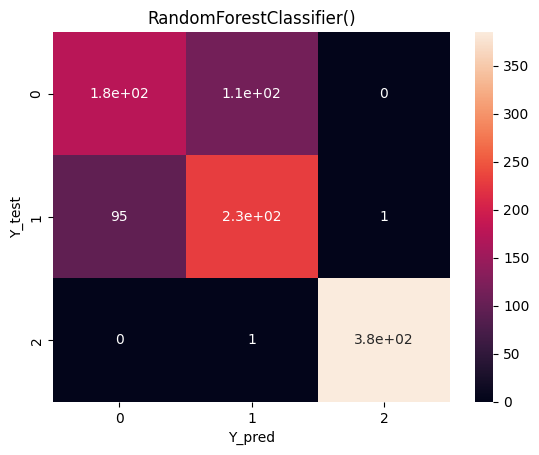

In [31]:
from sklearn.metrics import confusion_matrix
pred_list = [model]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sb.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()